![](../images/FE_00.png)

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from pyspark.sql import SparkSession

In [3]:
spark = SparkSession.builder.appName('Womens_Clothing_E_Commerce_Reviews').getOrCreate()

In [4]:
train = spark.read.parquet("../data/womens-ecommerce-clothing-reviews/womens-ecommerce-clothing-reviews_resampling.parquet")

In [5]:
train = train.withColumnRenamed('Rating', 'label')

In [6]:
test = spark.read.parquet("../data/womens-ecommerce-clothing-reviews/womens-ecommerce-clothing-reviews_test.parquet")

In [7]:
test = test.withColumnRenamed('Rating', 'label')

## 9.4. Random forest
### 9.4.1. Build model

In [8]:
from pyspark.ml.classification import RandomForestClassifier

In [9]:
rd = RandomForestClassifier()

In [10]:
rd_model_0 = rd.fit(train)

### 9.4.2. Đánh giá model
#### 9.4.2.1. Trên test

In [11]:
test_res_0 = rd_model_0.transform(test)

In [12]:
test_res_0.show()

+--------------------+-----+--------------------+--------------------+----------+
|            features|label|       rawPrediction|         probability|prediction|
+--------------------+-----+--------------------+--------------------+----------+
|(14162,[0,1,2,3,4...|    5|[0.0,2.4561342944...|[0.0,0.1228067147...|       5.0|
|(14162,[0,1,2,3,4...|    5|[0.0,2.5560818851...|[0.0,0.1278040942...|       5.0|
|(14162,[0,1,2,3,5...|    5|[0.0,2.4270873725...|[0.0,0.1213543686...|       5.0|
|(14162,[0,1,2,3,5...|    5|[0.0,2.3642278931...|[0.0,0.1182113946...|       5.0|
|(14162,[0,1,2,3,5...|    4|[0.0,2.6320871772...|[0.0,0.1316043588...|       5.0|
|(14162,[0,1,2,3,5...|    4|[0.0,2.6898393740...|[0.0,0.1344919687...|       5.0|
|(14162,[0,1,2,3,5...|    3|[0.0,2.6483327424...|[0.0,0.1324166371...|       5.0|
|(14162,[0,1,2,3,5...|    4|[0.0,2.5165489555...|[0.0,0.1258274477...|       5.0|
|(14162,[0,1,2,3,5...|    4|[0.0,2.8163250869...|[0.0,0.1408162543...|       5.0|
|(14162,[0,1,2,3

#### 9.4.2.2. Confusion matrix

In [13]:
cm = test_res_0.groupBy('label', 'prediction').count()

In [14]:
from modules.utils import confusionMatrix

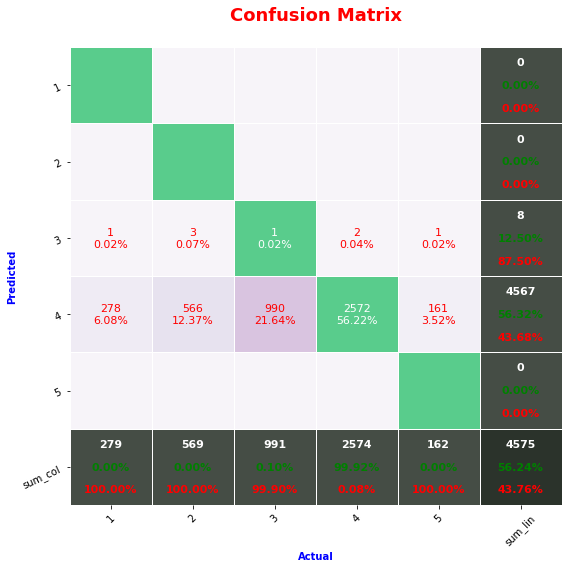

In [15]:
confusionMatrix(cm)

#### 9.4.2.3. Đánh giá bằng các metric

In [16]:
from modules.utils import classifierMultiEvaluator

In [17]:
classifierMultiEvaluator(test_res_0)

,0
Accuracy,0.562404
F1-Score,0.405718
Precision,0.343929
Recall,0.562404


> **Nhận xét:**
> * Không tốt hơn nhiều so với Logistic